### Step 1: Setting Up Your Environment
Make sure you have the necessary libraries installed. Install them using pip if you haven't already:

In [ ]:
# pip install numpy pandas scikit-learn matplotlib

### Step 2: Import Necessary Libraries
First, let's import all the required libraries.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Step 3: Load and Explore the Dataset
We'll use the Boston Housing dataset here, which used to be available directly from Scikit-learn :(
    
But we don't have that option, so we download the dataset csv file from Kaggle, and put the file in our folder. We do the loading manually.

In [ ]:
df_boston = pd.read_csv('BostonHousing.csv')
df_boston.tail(5)

In [ ]:
# define features
X = df_boston[['crim', 'rm', 'age', 'b']].values
X[:5]

# define target
y = df_boston['medv']
y[:5]

### Step 4: Preprocess the Data
Split the dataset into training and testing sets.

In [48]:
indices = np.arange(y.shape[0])
indices

rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

X_train, y_train = X_shuffled[:200], y_shuffled[:200]
X_test, y_test = X_shuffled[200:], y_shuffled[200:]

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 200 samples
Testing set size: 306 samples


### Step 5: Train a Linear Regression Model
Use Scikit-learn's LinearRegression to train the model.

In [49]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Output the model parameters
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: -25.657210855254693
Coefficients: [-0.17853052  7.26951759 -0.038725    0.017641  ]


### Step 6: Make Predictions
Use the trained model to make predictions on the test set.

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print('First few predictions:', y_pred[:5])
print('First few actual values:', y_test.values[:5])


First few predictions: [27.55780184 24.21599494 22.73602352 15.11512214 23.30837836]
First few actual values: [23.1 24.3 19.3 10.8 18.6]


### Step 7: Evaluate the Model
Calculate and print the Mean Squared Error (MSE) and R-squared (R²) value.

In [51]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²) value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 31.72083626992913
R-squared: 0.6180701497949037


### Step 8: Visualize the Results
Plot the actual vs. predicted values.

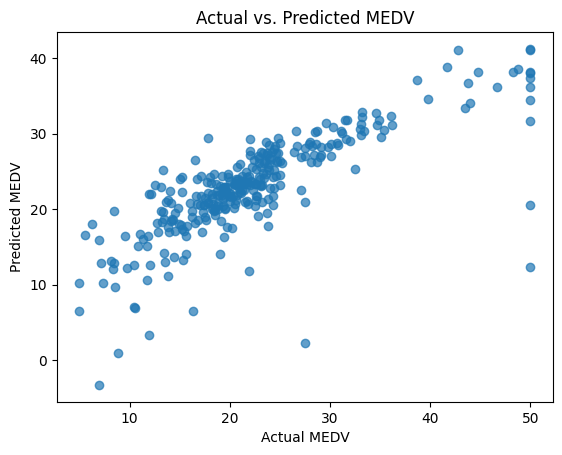

In [52]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs. Predicted MEDV')
plt.show()
